In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
data = pd.read_csv("../../dataset/cleaned_bank.csv", delimiter=',')

In [12]:
X = data.copy()
y = X.pop("y") # target feature

# Label encoding for categorical
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()
discrete_features = X.dtypes.apply(lambda dtype: np.issubdtype(dtype, np.integer))

# Train a Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)
# Get feature importances
importances = model.feature_importances_

# Create a DataFrame to hold the feature importances and sort them
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# Display the feature importance values
print(importance_df)

      Feature  Importance
11   duration    0.203512
10      month    0.159161
5     balance    0.148009
0         age    0.135520
9         day    0.115983
1         job    0.058081
12   campaign    0.047450
8     contact    0.033877
3   education    0.029927
2     marital    0.029820
6     housing    0.020232
7        loan    0.011229
4     default    0.007199
13      pdays    0.000000
14   previous    0.000000
15   poutcome    0.000000


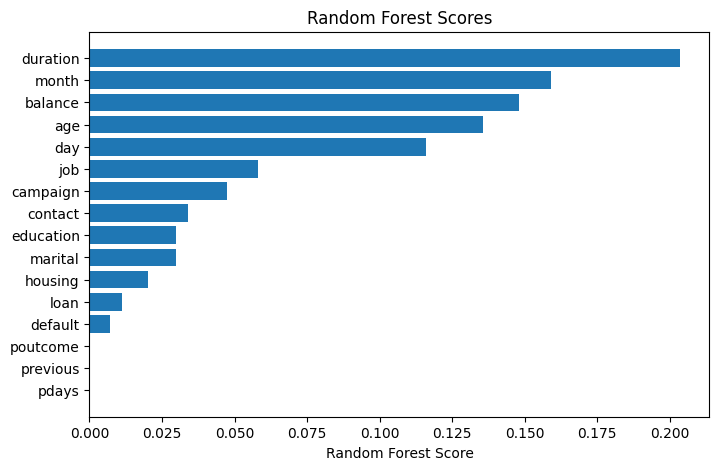

In [13]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Random Forest Scores")
    plt.xlabel("Random Forest Score")  

plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(importance_df.set_index('Feature')['Importance'])
plt.show()  